# Algoritmos de Clustering

Semana Tec

Profesores: José Ignacio Treviño/Luz Eunice Angeles

* **Clústering** se refiere a métodos que nos ayudan a formar subgrupos dentro de un conjunto de datos.

* La idea es que las observaciones que pertenezcan a un mismo grupo o *cluster* tengan **características similares** entre sí.

* A este tipo de algoritmos los clasificamos como **aprendizaje no supervisado** porque no tenemos una **variable de respuesta o dependiente** (no hay variable $y$). 

* Un ejemplo clásico de clusterización es cuando queremos hacer una *segmentación de mercado*. 

* El algoritmo más popular de clústering se llama *K-means*.

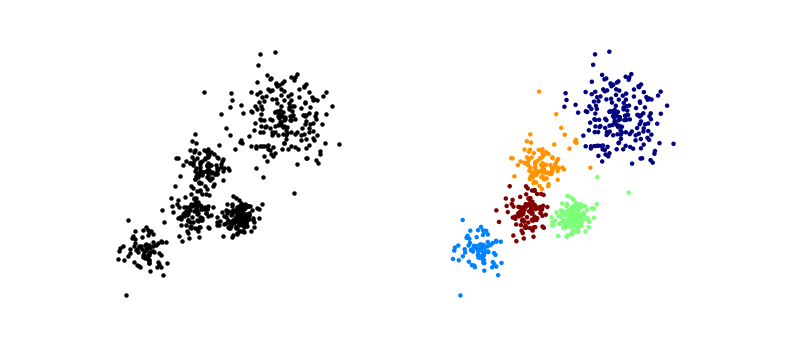

## K-Means

La premisa del algoritmo K-Means es definir $n$ grupos de tal manera que la distancia de los datos que pertenecen a cada grupo al centro de su respectivo grupo sea la más pequeña posible.

Matemáticamente, lo que queremos minimizar es la **within/intra-cluster sum of squares** (WCSS):
$$
W\biggl(\bigcup_{i=1}^k C_i\biggr) 
= \sum_{i=1}^k W(C_i) 
= \sum_{i=1}^k \biggl( \sum_{\boldsymbol x \in C_i} \| \boldsymbol x - \mu_i \|^2 \biggr)
$$

donde
- $k$ es el número de clústers que vamos a formar, 
- $C = \{C_1, C_2, \dots, C_k\}$, son los grupos a formar,
- $\boldsymbol x$ representan las observaciones,
- $\boldsymbol \mu_i$ es el punto céntrico del grupo $C_i$

## Paso a paso de K-means
1. Elegir el número de clústers.
  * En un inicio no sabemos cuál es el número de grupos ideal.
  * Con métodos como *el codo* podemos determinarlo.
  * Inicialmente los datos no pertenecen a ningún grupo.

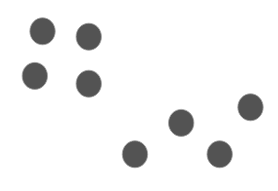

2. Inicializar coordenadas de los centroides.
  * Hay varias maneras de crear los centroides.

  * La forma más sencilla es seleccionar $k$ puntos aleatorios de los datos.


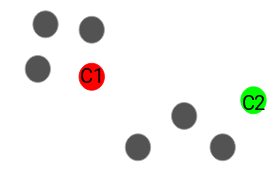

3. Asignar a cada punto un clúster.
  * Los grupos se asignan dependiendo del centroide más cercano.

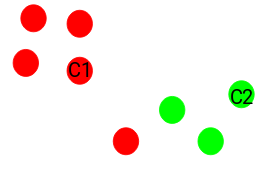

4. Recalcular los centroides 
  * Se promedian las coordenadas de los datos de cada grupo para obtener nuevos centroides.

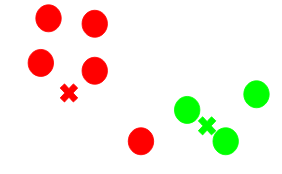

5. Repetir los pasos 3 y 4 hasta que los grupos dejen de cambiar.

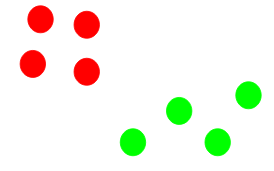

## Selección del número de grupos $k$

* La pregunta ahora es ¿Cuál es el número de clústers que hay que escoger?


* Cuando aumentamos el número de clústers, la **WCSS** siempre disminuye, pero no siempre con la misma rapidez.

* Conforme vamos aumentando el número de grupos, la WCSS disminuye cada vez mas lento.

* Una manera empírica para seleccionar el número de grupos es observar la gráfica enterior y buscar el punto donde se pase de tener un gran cambio a un cambio menor. 

  * Este es el **método del codo**. 
  * Como el nombre sugiere, hay que buscar el *doblez* del codo. 
  * El valor de $k$ donde se produce este doblez es el que hay que seleccionar.

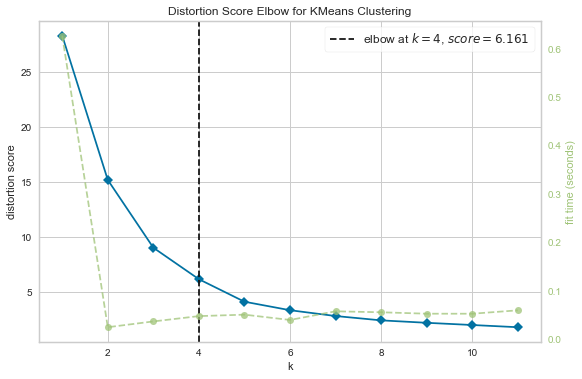

* Otra manera de seleccionar el valor de $k$ es con una métrica llamada **Silhouette Score**.

* Es una medida de la confiabilidad de que cada observación pertenezca a su respectivo clúster.

  * Tiene un valor entre 0 y 1. Entre más cercano sea a 1, hay más certeza de que cada dato pertenece al grupo correspondiente.

* Cuando evaluemos para diferentes valores de $k$, seleccionamos aquél que genere el silhouette score más alto.



## Segmentación de clientes

* La segmentación clientes es una herramienta poderosa para poder identificar grupos con características particulares y necesidades por satisfacer. 

* La manera más común para hacer una segmentación de clientes es con:

  * Información demográfica: edad, género, familia, estado civil, nivel de educación, ocupación, etc.
  * Información geográfica: dirección, ciudad, estado, código postal, etc.
  * Datos de comportamiento: hábitos de consumo, uso de productos/servicios, etc.

* Algunos de los beneficios de la segmentación de clientes son:
  - Ayuda para definir el precio adecuado de un producto/servicio.
  - Enfocan las campañas de marketing a clientes con potencial de compra.
  - mejor diseño de estrategias de distribución de productos.
  - Selección de características de un producto.

* Vamos a utilizar k-means para segmentar clientes de un centro comercial. Los datos están en el archivo `Mall Customers.csv`

In [ ]:
# Si trabajamos en Google Colaboratory corremos las siguientes lineas de código
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
# Nos cambiamos a la carpeta donde tengamos el repositorio
%cd '/gdrive/MyDrive/SemanaTec/arte-analitica'

In [ ]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
# Importar los datos
mall_df = pd.read_csv('data/Mall_Customers.csv')
mall_df.head()

In [ ]:
# Ver los tipos de datos
mall_df.info()

In [ ]:
# Resumen estadístico
mall_df.describe()

In [ ]:
# Vamos a eliminar la columna de CustomerID ya que no aporta información valiosa.
mall_df = mall_df.drop('CustomerID', axis=1)
mall_df.head()

In [ ]:
# Graficar las variables numéricas, incluimos el género

# Con subplot podemos incluir más de una gráfica por imagen.
# Vamos a graficar una cuadrícula de 1x3 imágenes
# También puedes graficar cada variable por separado.
fig, axs = plt.subplots(1,3, figsize=(12,4))

# Graficamos los tres boxplot en una sola imagen.
sns.boxplot(data=mall_df, y = 'Age', x='Gender', ax=axs[0])
sns.boxplot(data=mall_df, y = 'Annual Income (k$)', ax=axs[1], x='Gender')
sns.boxplot(data=mall_df, y = 'Spending Score (1-100)', ax=axs[2], x='Gender')

# Esta opción es para que se ajusten las imágenes a la cuadrícula
plt.tight_layout()

# Esta opción es para poner un título general para las tres gráficas
plt.suptitle('Distribución de las variables numéricas por género', y=1.05)

In [ ]:
# Veamos la correlación entre las variables numéricas.
# Graficamos la matriz de correlación con un heatmap
mall_corr = mall_df.corr()
sns.heatmap(data=mall_corr, vmin=-1, vmax = 1, cmap='RdBu', annot=True, square=True)

In [ ]:
# Vamos a hacer los scatterplot entre las tres variables numéricas. 
# Usamos pairplot para hacerlos en una sola imagen.
# Opcional, podemos separar los datos por género. Esto lo hacemos agregando Gender a los datos y usando el parámetro hue:
sns.pairplot(data=mall_df, hue='Gender')
plt.suptitle('Gráfico de pares de las variables numéricas por género', y=1.05)

* Podemos observar que las tres variables con las que vamos a trabajar tienen **escalas** muy diferentes:
  * La edad va de 18 a 70
  * El ingreso anual van de 15 a 137 kUSD
  * El puntaje de gasto varía de 1 a 100

* Esto puede afectar el algoritmo de KMeans, puesto que es un método que utiliza **distancia euclidiana**

* Lo recomentable es **normalizar** las variables para eliminar la diferencia en las escalas.

* Para normalizar variables en Python, utilizamos StandardScaler de SkLearn:

```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
```

In [ ]:
# Vamos a escalar las tres variables con StandardScaler. ¿De dónde proviene el nombre Standard?
from sklearn.preprocessing import StandardScaler

# Seleccionamos las variables a normalizar
numeric_cols = ['Age', 'Annual Income (k$)',	'Spending Score (1-100)']
X = mall_df.loc[:, numeric_cols]

# Hacemos el escalamiento.
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# El escalador nos genera una matriz de numpy. Vamos a convertirlo en DF
X_norm = pd.DataFrame(X_norm, columns=numeric_cols)
X_norm.head()

Método K-Means:

* Tenemos que probar el método k-means para diferentes números $k$. Esto lo haremos con ayuda de un ciclo `for`.

```python
# Importar la librería de Kmeans
from sklearn.cluster import KMeans
# Importar la librería para silhouette score
from sklearn.metrics import silhouette_score

# Probar para diferentes k
for(k in range(2,<k>):
  # Calcular el k-means
  model = KMeans(n_clusters = k)
  # Obtener los grupos o clusters
  groups = model.fit_predict(X)
  # Los centros de los grupos se guardan en cluster_centers_
  centros = model.cluster_centers_
  # Las distancias se guardan en inertia_
  wcss = model.inertia_
  # Calcular la Silouhette Score
  score = silhouette_score(X, groups)

# Mostrar los grupos (opcional)
# pseudocódigo!
plot(X, color=groups)
```

* Ahora, vamos a utilizar el método de K-Means para formar grupos y encontrar el número óptimo al correr el algoritmo para diferentes valores de k

In [ ]:
# Ya con los datos normalizados, ya podemos utilizar el algoritmo de KMeans. Primero hacemos la gráfica del codo y la de sihlouette score
# Podemos empezar con grupos de 2 a 10

# Importar librerias en caso de no haberlo hecho antes
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Estas son arreglos para guardar los valores de la WCSS 
# y la silhouette score
kmax   = 16
grupos = range(2, kmax)
wcss   = []
sil_score = []

# Ciclo para calcular K-Means para diferentes k
for k in grupos:
    # Clustering
    model = KMeans(n_clusters=k, random_state = 47)

    # Obtener las etiquetas
    clusters = model.fit_predict(X_norm)

    # Guardar WCSS
    wcss.append(model.inertia_)

    # Guardar Silhouette Score
    sil_score.append(silhouette_score(X_norm, clusters))

In [ ]:
# Vamos a graficar el codo y silhouette score en la misma gráfica
# Recordemos que subplots nos permite tener más gráficas en la misma figura
fig, axs = plt.subplots(1,2, figsize=(15,6))

# Primera figura es el codo
axs[0].plot(grupos, wcss)
axs[0].set_title('Método del codo')

# La segunda es el Silhouette Score
axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')

* De las gráficas anteriores, 6 sepresenta un buen número de grupos.

* Volvemos a calcular el KMeans para 6 grupos.

In [ ]:
# Generamos los 6 grupos
model = KMeans(n_clusters=6, random_state=47)
clusters = model.fit_predict(X_norm)

# Agregamos los clusters a nuestros DATOS ORIGINALES
mall_df['Grupo'] = clusters.astype('str')
mall_df.head()

In [ ]:
# Podemos agregar los colores en el pairplot para ver las características de cada grupo
# Para el mapa de color revisar: 
# https://matplotlib.org/stable/tutorials/colors/colormaps.html#:~:text=Matplotlib%20has%20a%20number%20of%20built-in%20colormaps%20accessible,your%20own%20colormaps,%20see%20Creating%20Colormaps%20in%20Matplotlib.

sns.pairplot(data=mall_df, hue='Grupo', palette='tab10')
plt.suptitle('6 grupos de clientes', y=1.05)

In [ ]:
# Vamos a graficar las 3 variables al mismo tiempo. Para ello, necesitamos importar una librería más
import plotly.express as px

# Creamos la figura donde graficaremos
fig = px.scatter_3d(mall_df, x = 'Age', y = 'Annual Income (k$)', z = 'Spending Score (1-100)', 
                    title='6 grupos de clientes',
                    color='Grupo',  color_discrete_sequence=px.colors.qualitative.D3)

# mostramos la imagen
fig.show()

In [ ]:
# Veamos las características de cada grupo (i.e. los centros)
mall_df.groupby('Grupo').mean()

In [ ]:
# También veamos las dispersiones
mall_df.groupby('Grupo').std()

Observando las gráficas y las tablas anteriores, podemos generar las siguiente conclusiones:

* El grupo 0 corresponde a adultos y adultos mayores con ingresos medios y con puntaje de compra medio.

* El grupo 1 corresponde a adultos jóvenes con ingresos altos y con puntaje de compra alto.

* El grupo 2 corresponde a personas con ingresos altos y con puntaje de compra bajo.

* El grupo 3 corresponde a jóvenes y adultos jóvenes con ingresos medios y con puntaje de compra medio.

* El grupo 4 corresponde a personas jóvenes con ingresos bajos y con puntaje de compra alto.

* El grupo 5 corresponde a personas adultas con ingresos bajos y con puntaje de compra bajo.

**Nota**: cada vez que corramos el algoritmo de K-Means sin asignar un valor a random_state, puede ser  que el número de las etiquetas varíe, pero los grupos serán los mismos

¿Qué grupos son adecuados para ofrecerles alguna promoción?